In [1]:
import pandas as pd
from matplotlib import pyplot 

#Read in the data
df = pd.read_csv("macroforecastingdata.csv")
df_usa_cy =pd.read_csv("usa_cy.csv")

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
from datetime import date

#Set the index column
indexed_df=df.set_index('dateid01')
indexed_df.index=pd.to_datetime(indexed_df.index, format="%Y/%m/%d")


indexed_df_usa_cy=df_usa_cy.set_index('dateid01')
indexed_df_usa_cy.index=pd.to_datetime(indexed_df_usa_cy.index, format="%Y/%m/%d")
print(indexed_df)
print(indexed_df.columns.tolist())
print(indexed_df_usa_cy.columns.tolist())

                             dateid    assets  assets_fin  \
dateid01                                                    
1945-01-01  1945-03-31 23:59:59.999       NaN         NaN   
1945-04-01  1945-06-30 23:59:59.999       NaN         NaN   
1945-07-01  1945-09-30 23:59:59.999       NaN         NaN   
1945-10-01  1945-12-31 23:59:59.999  797839.9    608512.9   
1946-01-01  1946-03-31 23:59:59.999       NaN         NaN   
...                             ...       ...         ...   
2014-10-01  2014-12-31 23:59:59.999       NaN         NaN   
2015-01-01  2015-03-31 23:59:59.999       NaN         NaN   
2015-04-01  2015-06-30 23:59:59.999       NaN         NaN   
2015-07-01  2015-09-30 23:59:59.999       NaN         NaN   
2015-10-01  2015-12-31 23:59:59.999       NaN         NaN   

            assets_nonfinancial  c_deflator  consumer_sentiment      cpi  \
dateid01                                                                   
1945-01-01                  NaN         NaN           

In [3]:
import numpy as np

#Create log variables
indexed_df["log rc"]=np.log(indexed_df["rc"])
indexed_df["log rdy"]=np.log(indexed_df["rdy"])
indexed_df['rnw']=indexed_df_usa_cy["rnw"]
indexed_df['log rnw']=np.log(indexed_df["rnw"])

#Add exogenous variables to the dataframe
indexed_df['unemployment']=indexed_df_usa_cy["unemp"]
indexed_df['consumer sentiment']=indexed_df_usa_cy["consumer_sentiment"]

#Show new dataframe
print(indexed_df)

#Show what all the columns are in our new dataframe
print(indexed_df.columns.tolist())

                             dateid    assets  assets_fin  \
dateid01                                                    
1945-01-01  1945-03-31 23:59:59.999       NaN         NaN   
1945-04-01  1945-06-30 23:59:59.999       NaN         NaN   
1945-07-01  1945-09-30 23:59:59.999       NaN         NaN   
1945-10-01  1945-12-31 23:59:59.999  797839.9    608512.9   
1946-01-01  1946-03-31 23:59:59.999       NaN         NaN   
...                             ...       ...         ...   
2014-10-01  2014-12-31 23:59:59.999       NaN         NaN   
2015-01-01  2015-03-31 23:59:59.999       NaN         NaN   
2015-04-01  2015-06-30 23:59:59.999       NaN         NaN   
2015-07-01  2015-09-30 23:59:59.999       NaN         NaN   
2015-10-01  2015-12-31 23:59:59.999       NaN         NaN   

            assets_nonfinancial  c_deflator  consumer_sentiment      cpi  \
dateid01                                                                   
1945-01-01                  NaN         NaN           

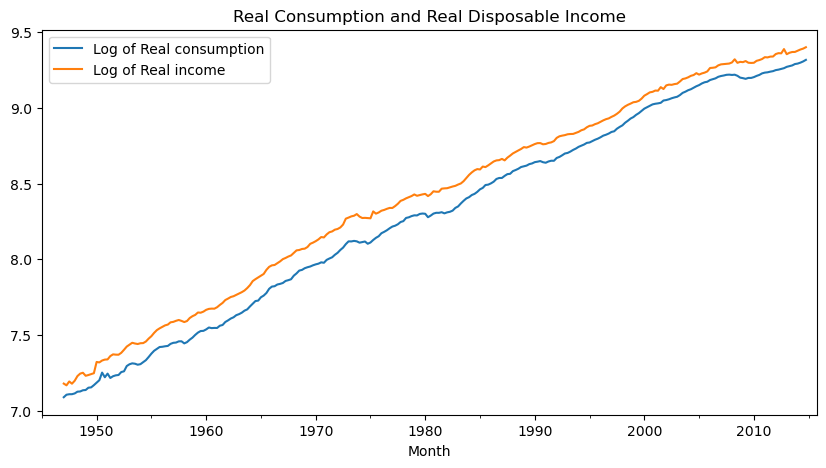

In [4]:
indexed_df.plot(y=['log rc', 'log rdy'], figsize=(10,5))
# Set the x-axis label
plt.xlabel('Month')
plt.legend(['Log of Real consumption', 'Log of Real income'])

# Set the title of the plot
plt.title('Real Consumption and Real Disposable Income')

# Display the plot
plt.show()

(284,) (284,) (284,)


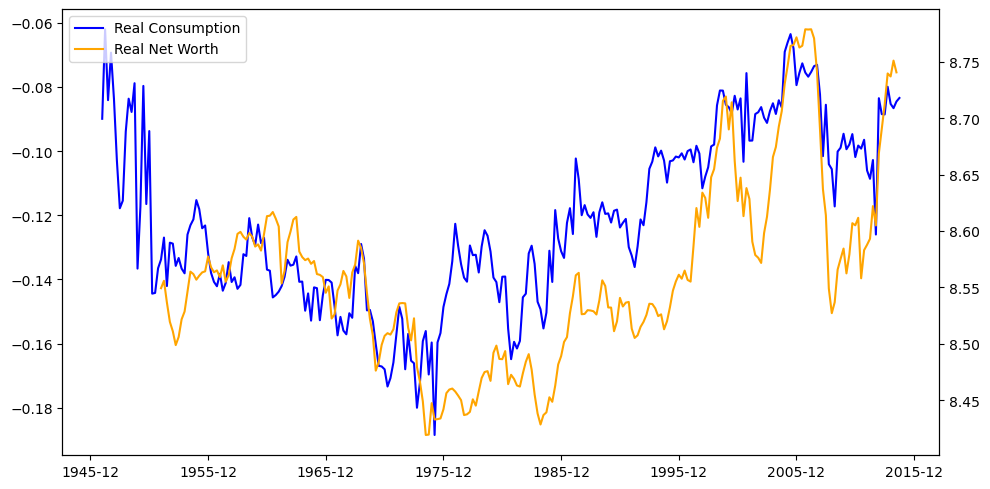

In [5]:
import datetime
from datetime import datetime

indexed_df['rc/rdy']=indexed_df['rc']/indexed_df['rdy']
indexed_df['rnw/rdy']=indexed_df['rnw']/indexed_df['rdy']

indexed_df['log(rc/rdy)'] = np.log(indexed_df['rc/rdy'])
indexed_df['log(rnw/rdy)']=np.log(indexed_df['rnw/rdy'])

A=pd.date_range(start='1945-01-01', end='2016-01-01', freq="10Y")
A_list=list(A.astype(str))

B=A
B.index=pd.to_datetime(A_list, format="%Y/%m/%d")

B_list=list(B.astype(str))

C=B.index.to_period('M')
C_list=list(C.astype(str))

y1= indexed_df['log(rc/rdy)']
y2=indexed_df['log(rnw/rdy)']
x=indexed_df.index

print(y1.shape, y2.shape, x.shape)

fig, ax1= plt.subplots(figsize=(10,5))
ax1.plot(x, y1, color='blue', label='Real Consumption')  

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'

ax2.plot(x, y2, color='orange', label='Real Net Worth') 

fig.tight_layout()

plt.xticks(A_list,C_list)

# Use both axes to create the legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')



# otherwise the right y-label is slightly clipped
plt.show()


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     300.3
Date:                Thu, 08 Jan 2026   Prob (F-statistic):           1.13e-44
Time:                        18:02:21   Log-Likelihood:                 655.64
No. Observations:                 251   AIC:                            -1307.
Df Residuals:                     249   BIC:                            -1300.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1799      0.119    -18.368      0.0

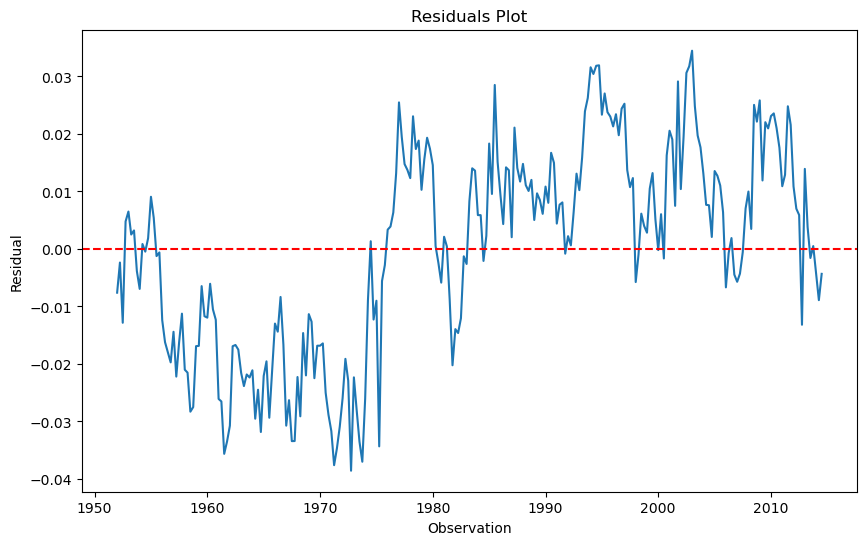

In [116]:
filtered_df=indexed_df.dropna(subset=['log rc', 'log rnw',])


import statsmodels.api as sm
y1_values=filtered_df['log(rc/rdy)'].tolist()
y2_values=filtered_df['log(rnw/rdy)'].tolist()
y2_values=sm.add_constant(y2_values)
y3_values=filtered_df['log rnw']
x1=filtered_df.index

import statsmodels.api as sm

results=sm.OLS(y1_values,y2_values).fit()
results.summary
print(results.summary())

residuals=results.resid


plt.figure(figsize=(10, 6))
plt.plot(x1, residuals)

plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.title('Residuals Plot')
plt.xlabel('Observation')
plt.ylabel('Residual')
plt.show()

In [6]:

filtered_df['dateid'] = pd.to_datetime(filtered_df['dateid'])
filtered_df['structural_break'] = (filtered_df['dateid'].dt.year >= 1975).astype(int)

structural_break_values=df_subset['structural_break'].tolist()

merged_array = np.column_stack((y2_values, structural_break_values))

results=sm.OLS(y1_values,merged_array).fit()
results.summary
print(results.summary())

residuals=results.resid

print(residuals.shape)
plt.figure(figsize=(10, 6))
plt.plot(x1, residuals)

plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.title('Residuals Plot')
plt.xlabel('Observation')
plt.ylabel('Residual')
plt.show()

NameError: name 'filtered_df' is not defined

In [ ]:
from statsmodels.tsa.stattools import adfuller
filtered_df_1976 = filtered_df[filtered_df.index >= '1976-01-01']

log_rc_list = filtered_df_1976['log rc'].tolist()
log_rdy_list = filtered_df_1976['log rdy'].tolist()
log_rnw_list = filtered_df_1976['log rnw'].tolist()


result1=adfuller(log_rc_list,autolag='AIC')

result2=adfuller(log_rdy_list,autolag='AIC')

result3=adfuller(log_rnw_list,autolag='AIC')

print("log rc results:", result1)
print("log rdy results:", result2)
print("log rnw results:", result3)

In [ ]:


df_3 = pd.DataFrame({
    'log(rc)': log_rc_list,
    'log(rdy)': log_rdy_list,
    'log(rnw)': log_rnw_list,
}, index=filtered_df_1976.index)

print(df_3)

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.var_model import VAR as VAR_model

# Assuming df_3 is your dataframe with time series data
# First, make sure your data is stationary

# Fit VAR model
model = VAR(df_3)

# Find optimal lag order using information criteria
lag_order_results = model.select_order(maxlags=15)  # Adjust maxlags as needed

# Access each information criterion
aic = lag_order_results.aic
bic = lag_order_results.bic
fpe = lag_order_results.fpe
hqic = lag_order_results.hqic

print('AIC:', aic)
print('BIC:', bic)
print('FPE:', fpe)
print('HQIC:', hqic)

# To get all results at once:
print(lag_order_results.summary())


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.var_model import VAR as VAR_model
from statsmodels.tsa.vector_ar.vecm import coint_johansen

print(df_3)


# Perform Johansen cointegration test
# The test requires specification of:
# - Deterministic trend order (constant, linear trend, etc.)
# - Maximum number of lags to test

# Common trend orders:
# 0: no deterministic trend (default)
# 1: constant term
# 2: constant and linear trend

# Choose your deterministic trend order
det_order = 1  # Using constant term

# Perform Johansen test
johansen_test = coint_johansen(df_3, det_order=det_order, k_ar_diff=2)

# Extract results
trace_stat = johansen_test.lr1
trace_crit = johansen_test.cvt
max_eig_stat = johansen_test.lr2
max_eig_crit = johansen_test.cvm

# Print results
print("Trace Statistics:")
print(trace_stat)
print("\nTrace Statistics Critical Values (90%, 95%, 99%):")
print(trace_crit)

print("\nMaximum Eigenvalue Statistics:")
print(max_eig_stat)
print("\nMaximum Eigenvalue Critical Values (90%, 95%, 99%):")
print(max_eig_crit)

In [ ]:
def johansen_cointegration_test(data, det_order=0, k_ar_diff=1):
    """
    Perform Johansen cointegration test with formatted output
    
    Parameters:
    -----------
    data : pandas DataFrame
        Your time series data (should be non-stationary/I(1))
    det_order : int
        Deterministic trend order (0=no trend, 1=constant, 2=trend)
    k_ar_diff : int
        Number of lags in differences (VAR lag - 1)
    
    Returns:
    --------
    Formatted output tables for Trace and Max Eigenvalue tests
    """
    
    # Perform Johansen test
    result = coint_johansen(data, det_order=det_order, k_ar_diff=k_ar_diff)
    
    # Number of variables
    n_vars = data.shape[1]
    
    # Create Trace Test Table
    trace_df = pd.DataFrame({
        'Null Hypothesis': [f'r ≤ {i}' for i in range(n_vars)],
        'Test Statistic': result.lr1,
        '10% Critical Value': result.cvt[:, 0],
        '5% Critical Value': result.cvt[:, 1], 
        '1% Critical Value': result.cvt[:, 2]
    })
    
    # Add results column for trace test
    trace_results = []
    for i in range(n_vars):
        if result.lr1[i] > result.cvt[i, 1]:  # 5% level
            trace_results.append('Reject')
        else:
            trace_results.append('Fail to reject')
    trace_df['Result (5%)'] = trace_results
    
    # Create Max Eigenvalue Test Table
    max_eigen_df = pd.DataFrame({
        'Null Hypothesis': [f'r = {i}' for i in range(n_vars)],
        'Test Statistic': result.lr2,
        '10% Critical Value': result.cvm[:, 0],
        '5% Critical Value': result.cvm[:, 1],
        '1% Critical Value': result.cvm[:, 2]
    })
    
    # Add results column for max eigenvalue test
    max_results = []
    for i in range(n_vars):
        if result.lr2[i] > result.cvm[i, 1]:  # 5% level
            max_results.append('Reject')
        else:
            max_results.append('Fail to reject')
    max_eigen_df['Result (5%)'] = max_results
    
    # Create Cointegrating Vectors Table
    coint_vectors_df = pd.DataFrame(
        result.evec[:, :n_vars].T,
        columns=data.columns,
        index=[f'Vector {i+1}' for i in range(n_vars)]
    )
    
    # Print formatted results
    print("=" * 80)
    print("JOHANSEN COINTEGRATION TEST RESULTS")
    print("=" * 80)
    print()
    
    print("TRACE TEST:")
    print("-" * 80)
    print(trace_df.round(4))
    print()
    
    print("MAXIMUM EIGENVALUE TEST:")
    print("-" * 80)
    print(max_eigen_df.round(4))
    print()
    
    print("COINTEGRATING VECTORS (Eigenvectors):")
    print("-" * 80)
    print(coint_vectors_df.round(4))
    print()
    
    # Determine number of cointegrating relationships
    trace_coint = sum(result.lr1 > result.cvt[:, 1])
    max_coint = sum(result.lr2 > result.cvm[:, 1])
    
    return {
        'result': result,
        'trace_table': trace_df, 
        'max_eigen_table': max_eigen_df,
        'vectors_table': coint_vectors_df
    }


# Example usage with your data:
# Assuming you have your dataframe ready
def run_cointegration_analysis(df):
    """
    Run complete cointegration analysis on your dataframe
    """
    
    # Make sure your data is properly formatted
    # df should contain your log(rc), log(rdy), log(rnw) columns
    
    # Run Johansen test (adjust k_ar_diff based on your VAR lag selection - 1)
    result, trace_table, max_eigen_table, vectors_table = johansen_cointegration_test(
        df, 
        det_order=1,  # Include constant term
        k_ar_diff=3   # Use 3 if your optimal VAR lag was 4
    )
    
    return trace_table, max_eigen_table, vectors_table

print(df_3)
# With your existing dataframe (df_3)
result, trace_table, max_eigen_table, vectors_table = johansen_cointegration_test(
    df_3,
    det_order=1,
    k_ar_diff=2
)

In [7]:
unemployment = filtered_df_1976['unemployment'].tolist()
consumer_sentiment = filtered_df_1976['consumer sentiment'].tolist()
gov_transfers=filtered_df_1976['gov_transfers'].tolist()
y_deflator=filtered_df_1976['y_deflator'].tolist()
interest_payments=filtered_df_1976['interest_payments'].tolist()

df_4=pd.DataFrame({
    'log(rc)': log_rc_list,
    'log(rdy)': log_rdy_list,
    'log(rnw)': log_rnw_list,
    'unemployment':unemployment,
    'consumer_sentiment':consumer_sentiment,
}, index=filtered_df_1976.index)


print(df_4)


    

NameError: name 'filtered_df_1976' is not defined

In [8]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.vector_ar.vecm import VECM


print(filtered_df_1976)

# 1. Prepare the data
# Endogenous variables: log(rc), log(rnw), log(rdy)
endog = df_4[['log(rc)', 'log(rdy)', 'log(rnw)']]


# Exogenous variables: consumer_sentiment, structural_break, unemployment
exog = df_4[['consumer_sentiment', 'unemployment']]

# 2. Set up the VECM model with k_ar_diff=1 (lag of 1) and coint_rank=1 (1 cointegrating vector)
# Note: k_ar_diff is the lag order of the differenced VAR, so 1 means 2 lags in levels
model = VECM(endog=endog, exog=exog, k_ar_diff=1, coint_rank=1, 
             deterministic="ci", seasons=0)

# 3. Fit the model
fitted_model = model.fit()

# 4. Print the results
print(fitted_model.summary())

# 5. Access components differently
print("Cointegrating Vector:")
print(fitted_model.beta)

print("\nLoading Matrix (Adjustment Coefficients):")
print(fitted_model.alpha)


# The exogenous variable coefficients will be included in the params
# You can also look at the individual equations:
print("\nCoefficients for Each Equation:")

# 6. For impulse response functions
try:
    irf = fitted_model.irf(10)  # 10 periods ahead
    print("\nImpulse Response Functions:")
    print(irf)
    # Try to plot them if possible
    try:
        irf.plot(orth=False)
    except:
        print("Could not plot IRFs, but they were calculated")
except AttributeError:
    print("\nIRF functionality not available in this version of statsmodels")
    

NameError: name 'filtered_df_1976' is not defined

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.vector_ar.vecm import VECM
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')
def simple_vecm_forecast(data, train_end_date, coint_rank=1, k_ar_diff=1):
    """
    Simple VECM forecasting function - just specify when training should end!
    
    Parameters:
    -----------
    data : pandas DataFrame
        Your time series data 
    train_end_date : str
        End date for training (e.g., '2007-12-31')
        Everything after this date will be used for testing/forecasting
    coint_rank : int, default=1
        Number of cointegrating relationships
    k_ar_diff : int, default=1
        Number of lags in differences
        
    Returns:
    --------
    Dictionary with forecast results and metrics
    """
    
    # Check if train_end_date is provided
    if train_end_date is None:
        print("❌ ERROR: You must specify train_end_date!")
        print("📝 Example: simple_vecm_forecast(data, train_end_date='2007-12-31')")
        return None
    
    # Use these columns - change if your columns are different
    endog_vars = ['log(rc)', 'log(rdy)', 'log(rnw)']
    
    # Quick column check
    missing_cols = [col for col in endog_vars if col not in data.columns]
    if missing_cols:
        print(f"❌ ERROR: Missing columns: {missing_cols}")
        print(f"📋 Your columns: {list(data.columns)}")
        return None
    
    print(f"✅ Using columns: {endog_vars}")
    print(f"📅 Training ends: {train_end_date}")
    
    # Make sure index is datetime
    if not isinstance(data.index, pd.DatetimeIndex):
        data.index = pd.to_datetime(data.index)
    
    # Split the data
    train_data = data[endog_vars].loc[:train_end_date]
    test_data = data[endog_vars].loc[train_end_date:].iloc[1:]  # Skip overlap
    
    # Clean test data (remove NaN)
    test_data_clean = test_data.dropna()
    
    if len(test_data_clean) == 0:
        print("❌ ERROR: No valid test data!")
        return None
    
    print(f"📊 Training: {len(train_data)} observations")
    print(f"📊 Testing: {len(test_data_clean)} observations")
    print(f"📊 Test period: {test_data_clean.index[0]} to {test_data_clean.index[-1]}")
    
    # Fit VECM model
    print("🔧 Fitting VECM model...")
    try:
        vecm_model = VECM(train_data.values, 
                         k_ar_diff=k_ar_diff,
                         coint_rank=coint_rank)
        vecm_fitted = vecm_model.fit()
        print("✅ VECM fitted successfully!")
    except Exception as e:
        print(f"❌ VECM fitting failed: {e}")
        return None
    
    # Generate STATIC forecast (one-step-ahead using actual lagged values)
    steps_ahead = len(test_data_clean)
    print(f"🚀 Generating {steps_ahead}-step STATIC forecast...")
    
    try:
        # For static forecast, we need to use actual observed values at each step
        forecast_list = []
        
        for i in range(steps_ahead):
            # Use actual data up to current point for each one-step forecast
            current_train = pd.concat([train_data, test_data_clean.iloc[:i]]) if i > 0 else train_data
            
            # Refit model with updated data
            temp_model = VECM(current_train.values, 
                             k_ar_diff=k_ar_diff,
                             coint_rank=coint_rank)
            temp_fitted = temp_model.fit()
            
            # Forecast just one step ahead
            one_step = temp_fitted.forecast(steps=1)
            forecast_list.append(one_step[0])
        
        forecast = np.array(forecast_list)
        print("✅ Static forecast generated!")
        
    except Exception as e:
        print(f"❌ Forecasting failed: {e}")
        return None
    
    # Create results dataframes
    forecast_df = pd.DataFrame(forecast,
                              index=test_data_clean.index,
                              columns=endog_vars)
    
    actual_df = test_data_clean.copy()
    
    # Calculate metrics
    print("\n📈 FORECAST ACCURACY:")
    print("=" * 40)
    
    metrics = {}
    for var in endog_vars:
        actual_vals = actual_df[var].values
        forecast_vals = forecast_df[var].values
        
        rmse = np.sqrt(mean_squared_error(actual_vals, forecast_vals))
        mae = mean_absolute_error(actual_vals, forecast_vals)
        mape = mean_absolute_percentage_error(actual_vals, forecast_vals) * 100
        
        metrics[var] = {
            'RMSE': rmse,
            'MAE': mae, 
            'MAPE': mape
        }
        
        print(f"{var}:")
        print(f"  RMSE: {rmse:.6f}")
        print(f"  MAE:  {mae:.6f}")
        print(f"  MAPE: {mape:.2f}%")
        print()
    
    # Simple plot
    fig, axes = plt.subplots(len(endog_vars), 1, figsize=(12, 4*len(endog_vars)))
    if len(endog_vars) == 1:
        axes = [axes]
    
    for i, var in enumerate(endog_vars):
        # Plot training data
        axes[i].plot(train_data.index, train_data[var], 
                    label='Training', color='blue', alpha=0.7)
        
        # Plot actual test data
        axes[i].plot(actual_df.index, actual_df[var], 
                    label='Actual', color='black', linewidth=2)
        
        # Plot forecast
        axes[i].plot(forecast_df.index, forecast_df[var], 
                    label='Forecast', color='red', linestyle='--', linewidth=2)
        
        axes[i].set_title(f'{var} - VECM STATIC Forecast')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
        
        # Add vertical line at train/test split
        axes[i].axvline(x=pd.to_datetime(train_end_date), 
                       color='green', linestyle=':', alpha=0.7, 
                       label='Train/Test Split')
    
    plt.tight_layout()
    plt.show()
    
    # Return everything
    results = {
        'forecast': forecast_df,
        'actual': actual_df,
        'metrics': metrics,
        'vecm_model': vecm_fitted,
        'train_end_date': train_end_date,
        'test_period': f"{test_data_clean.index[0]} to {test_data_clean.index[-1]}"
    }
    
    print("🎉 Done! Check the 'results' dictionary for all outputs.")
    return results

In [9]:
print(df_4)
print(results)

NameError: name 'df_4' is not defined

In [10]:
import numpy as np
import pandas as pd
from statsmodels.tsa.vector_ar.vecm import VECM
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

def simple_vecm_forecast_static(data, train_end_date, coint_rank=1, k_ar_diff=1):
    """
    STATIC VECM forecasting - uses actual observed lagged values at each step
    """
    
    if train_end_date is None:
        print("❌ ERROR: You must specify train_end_date!")
        return None
    
    endog_vars = ['log(rc)', 'log(rdy)', 'log(rnw)']
    
    missing_cols = [col for col in endog_vars if col not in data.columns]
    if missing_cols:
        print(f"❌ ERROR: Missing columns: {missing_cols}")
        return None
    
    print(f"✅ Using columns: {endog_vars}")
    print(f"📅 Training ends: {train_end_date}")
    
    if not isinstance(data.index, pd.DatetimeIndex):
        data.index = pd.to_datetime(data.index)
    
    train_data = data[endog_vars].loc[:train_end_date]
    test_data = data[endog_vars].loc[train_end_date:].iloc[1:]
    test_data_clean = test_data.dropna()
    
    if len(test_data_clean) == 0:
        print("❌ ERROR: No valid test data!")
        return None
    
    print(f"📊 Training: {len(train_data)} observations")
    print(f"📊 Testing: {len(test_data_clean)} observations")
    print(f"📊 Test period: {test_data_clean.index[0]} to {test_data_clean.index[-1]}")
    
    print("🔧 Fitting initial VECM model...")
    try:
        vecm_model = VECM(train_data.values, 
                         k_ar_diff=k_ar_diff,
                         coint_rank=coint_rank)
        vecm_fitted = vecm_model.fit()
        print("✅ VECM fitted successfully!")
    except Exception as e:
        print(f"❌ VECM fitting failed: {e}")
        return None
    
    steps_ahead = len(test_data_clean)
    print(f"🚀 Generating {steps_ahead}-step STATIC forecast...")
    print("   (This refits the model at each step - may take a while)")
    
    try:
        forecast_list = []
        
        for i in range(steps_ahead):
            if i == 0:
                data_for_forecast = train_data
            else:
                data_for_forecast = pd.concat([train_data, test_data_clean.iloc[:i]])
            
            temp_model = VECM(data_for_forecast.values, 
                             k_ar_diff=k_ar_diff,
                             coint_rank=coint_rank)
            temp_fitted = temp_model.fit()
            
            # Use predict method with steps=1
            one_step_forecast = temp_fitted.predict(steps=1)
            forecast_list.append(one_step_forecast[0])
            
            if (i + 1) % 10 == 0:
                print(f"  Completed {i + 1}/{steps_ahead} forecasts...")
        
        forecast = np.array(forecast_list)
        print("✅ Static forecast generated!")
        
    except Exception as e:
        print(f"❌ Forecasting failed: {e}")
        import traceback
        traceback.print_exc()
        return None
    
    forecast_df = pd.DataFrame(forecast,
                              index=test_data_clean.index,
                              columns=endog_vars)
    
    actual_df = test_data_clean.copy()
    
    print("\n📈 FORECAST ACCURACY (STATIC):")
    print("=" * 40)
    
    metrics = {}
    for var in endog_vars:
        actual_vals = actual_df[var].values
        forecast_vals = forecast_df[var].values
        
        rmse = np.sqrt(mean_squared_error(actual_vals, forecast_vals))
        mae = mean_absolute_error(actual_vals, forecast_vals)
        mape = mean_absolute_percentage_error(actual_vals, forecast_vals) * 100
        
        metrics[var] = {
            'RMSE': rmse,
            'MAE': mae, 
            'MAPE': mape
        }
        
        print(f"{var}:")
        print(f"  RMSE: {rmse:.6f}")
        print(f"  MAE:  {mae:.6f}")
        print(f"  MAPE: {mape:.2f}%")
        print()
    
    fig, axes = plt.subplots(len(endog_vars), 1, figsize=(12, 4*len(endog_vars)))
    if len(endog_vars) == 1:
        axes = [axes]
    
    for i, var in enumerate(endog_vars):
        axes[i].plot(train_data.index, train_data[var], 
                    label='Training', color='blue', alpha=0.7)
        axes[i].plot(actual_df.index, actual_df[var], 
                    label='Actual', color='black', linewidth=2)
        axes[i].plot(forecast_df.index, forecast_df[var], 
                    label='Static Forecast', color='green', linestyle='--', linewidth=2)
        
        axes[i].set_title(f'{var} - VECM Static Forecast')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
        axes[i].axvline(x=pd.to_datetime(train_end_date), 
                       color='purple', linestyle=':', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    results = {
        'forecast': forecast_df,
        'actual': actual_df,
        'metrics': metrics,
        'vecm_model': vecm_fitted,
        'train_end_date': train_end_date,
        'test_period': f"{test_data_clean.index[0]} to {test_data_clean.index[-1]}"
    }
    
    print("🎉 Done! Check the 'results' dictionary for all outputs.")
    return results

In [11]:
def plot_static_forecast(results, df, variable_name, original_scale=True):
    """
    Plot static (one-step-ahead) forecast vs actual data for VECM results
    
    Parameters:
    - results: Dictionary containing VECM results with 'model' key (fitted VECM model)
    - df: Original dataframe with full time series
    - variable_name: Name of variable to plot (e.g., 'log(rnw)', 'log(rc)', 'log(rdy)')
    - original_scale: If True, convert from log scale to original scale
    """
    
    # Extract actual test data
    actual_test_data = results['actual'][variable_name]
    
    # Get the fitted model
    fitted_model = results['vecm_model']
    
    # Generate static forecast (one-step-ahead at each point)
    # This uses actual observed values for lagged terms
    static_forecast = fitted_model.predict(steps=len(actual_test_data))
    
    # Extract the specific variable column
    var_idx = list(df.columns).index(variable_name)
    forecast_data = pd.Series(static_forecast[:, var_idx], 
                             index=actual_test_data.index)
    
    # Get training data (everything before the test period)
    train_end_idx = len(df) - len(actual_test_data)
    training_data = df[variable_name][:train_end_idx]
    
    # Convert to original scale if needed
    if original_scale and 'log(' in variable_name:
        forecast_data = np.exp(forecast_data)
        actual_test_data = np.exp(actual_test_data)
        training_data = np.exp(training_data)
        
        # Clean variable name for title
        clean_var_name = variable_name.replace('log(', '').replace(')', '')
        y_label = clean_var_name
        title = f"{clean_var_name} - Static Forecast vs Actual"
    else:
        clean_var_name = variable_name
        y_label = variable_name
        title = f"{variable_name} - Static Forecast vs Actual"
    
    # Create the plot
    plt.figure(figsize=(10, 5))
    
    # Plot training data
    plt.plot(training_data.index, training_data.values, 
             color='lime', linewidth=3.0, label='Training Data')
    
    # Plot actual test data
    plt.plot(actual_test_data.index, actual_test_data.values, 
             color='black', linewidth=2, label='Actual Test Data')
    
    # Plot static forecast
    plt.plot(forecast_data.index, forecast_data.values, 
             color='blue', linewidth=2, linestyle='--', label='Static Forecast (One-Step-Ahead)')
    
    
    last_train_date = training_data.index[-1]
    first_forecast_date = forecast_data.index[0]
    split_date = pd.Timestamp(last_train_date) + (pd.Timestamp(first_forecast_date) - pd.Timestamp(last_train_date)) / 2
    
    
    # Add vertical line at train/test split
    plt.axvline(x=split_date, color='firebrick', linestyle=':', alpha=0.7, label='Train/Test Split')
    
    # Formatting
    plt.title(title, fontsize=20, fontweight='bold')
    plt.xlabel('Year', fontsize=15)
    plt.ylabel(y_label, fontsize=15)
    plt.legend(loc='upper left', fontsize=9)
    plt.grid(True, alpha=0.3)
    
    # Set x-axis to show years nicely
    plt.xticks(rotation=0)
    
    plt.tight_layout()
    plt.show()
    
print(results)

NameError: name 'results' is not defined

# Define and plot static forecast

✅ Using columns: ['log(rc)', 'log(rdy)', 'log(rnw)']
📅 Training ends: 2004-03-31
📊 Training: 113 observations
📊 Testing: 41 observations
📊 Test period: 2004-07-01 00:00:00 to 2014-07-01 00:00:00
🔧 Fitting initial VECM model...
✅ VECM fitted successfully!
🚀 Generating 41-step STATIC forecast...
   (This refits the model at each step - may take a while)
  Completed 10/41 forecasts...
  Completed 20/41 forecasts...
  Completed 30/41 forecasts...
  Completed 40/41 forecasts...
✅ Static forecast generated!

📈 FORECAST ACCURACY (STATIC):
log(rc):
  RMSE: 0.004288
  MAE:  0.003377
  MAPE: 0.04%

log(rdy):
  RMSE: 0.010341
  MAE:  0.006930
  MAPE: 0.07%

log(rnw):
  RMSE: 0.022631
  MAE:  0.017668
  MAPE: 0.10%



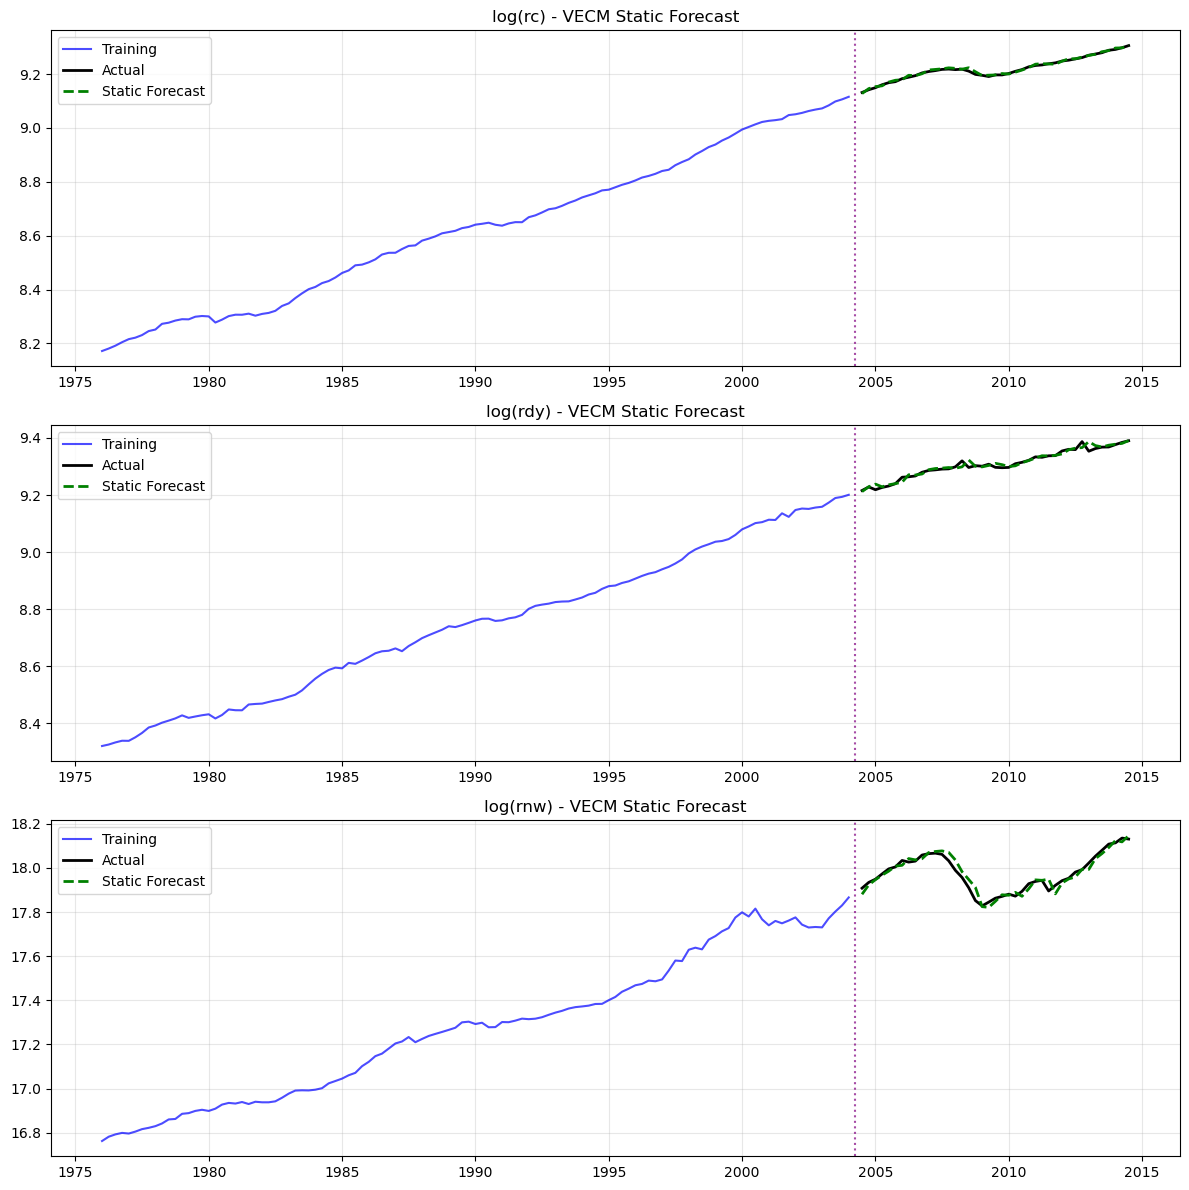

🎉 Done! Check the 'results' dictionary for all outputs.


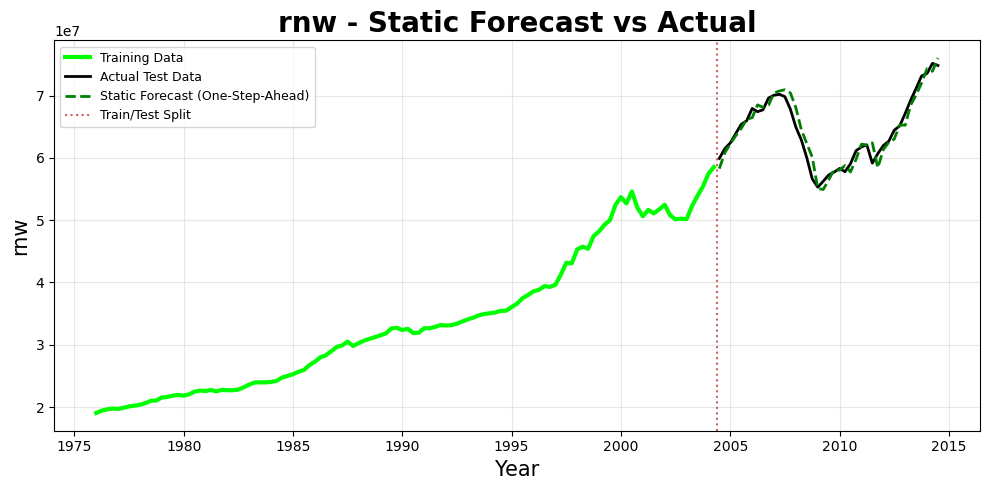

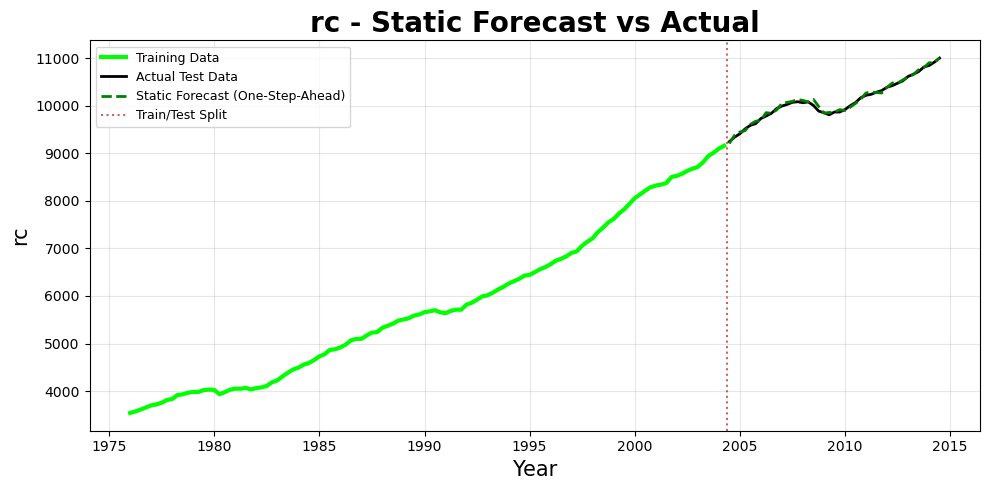

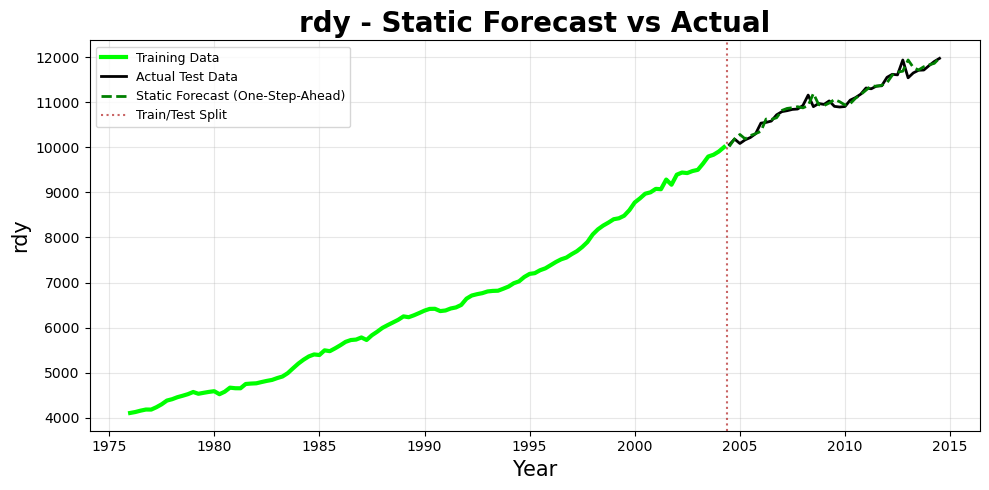

In [131]:
def plot_static_forecast(results, df, variable_name, original_scale=True):
    """
    Plot static (one-step-ahead) forecast vs actual data for VECM results
    
    Parameters:
    - results: Dictionary containing VECM results with 'forecast' and 'actual' keys
    - df: Original dataframe with full time series
    - variable_name: Name of variable to plot (e.g., 'log(rnw)', 'log(rc)', 'log(rdy)')
    - original_scale: If True, convert from log scale to original scale
    """
    
    # Extract data from results dictionary
    forecast_data = results['forecast'][variable_name]
    actual_test_data = results['actual'][variable_name]
    
    # Get training data (everything before the test period)
    train_end_idx = len(df) - len(actual_test_data)
    training_data = df[variable_name][:train_end_idx]
    
    # Convert to original scale if needed
    if original_scale and 'log(' in variable_name:
        forecast_data = np.exp(forecast_data)
        actual_test_data = np.exp(actual_test_data)
        training_data = np.exp(training_data)
        
        # Clean variable name for title
        clean_var_name = variable_name.replace('log(', '').replace(')', '')
        y_label = clean_var_name
        title = f"{clean_var_name} - Static Forecast vs Actual"
    else:
        clean_var_name = variable_name
        y_label = variable_name
        title = f"{variable_name} - Static Forecast vs Actual"
    
    # Create the plot
    plt.figure(figsize=(10, 5))
    
    # Plot training data
    plt.plot(training_data.index, training_data.values, 
             color='lime', linewidth=3.0, label='Training Data')
    
    # Plot actual test data
    plt.plot(actual_test_data.index, actual_test_data.values, 
             color='black', linewidth=2, label='Actual Test Data')
    
    # Plot static forecast
    plt.plot(forecast_data.index, forecast_data.values, 
             color='green', linewidth=2, linestyle='--', label='Static Forecast (One-Step-Ahead)')
    
    # Calculate split date for vertical line
    last_train_date = training_data.index[-1]
    first_forecast_date = forecast_data.index[0]
    split_date = pd.Timestamp(last_train_date) + (pd.Timestamp(first_forecast_date) - pd.Timestamp(last_train_date)) / 2
    
    # Add vertical line at train/test split
    plt.axvline(x=split_date, color='firebrick', linestyle=':', alpha=0.7, label='Train/Test Split')
    
    # Formatting
    plt.title(title, fontsize=20, fontweight='bold')
    plt.xlabel('Year', fontsize=15)
    plt.ylabel(y_label, fontsize=15)
    plt.legend(loc='upper left', fontsize=9)
    plt.grid(True, alpha=0.3)
    
    # Set x-axis to show years nicely
    plt.xticks(rotation=0)
    
    plt.tight_layout()
    plt.show()

    
results_static = simple_vecm_forecast_static(df_4, train_end_date='2004-03-31')

# Plot individual variables
plot_static_forecast(results_static, df_4, 'log(rnw)', original_scale=True)
plot_static_forecast(results_static, df_4, 'log(rc)', original_scale=True)
plot_static_forecast(results_static, df_4, 'log(rdy)', original_scale=True)